# Melb PTV Datathon 2018: Data Wrangling


Intro:
Just grab the parent route data from the card data and do some simple visualisations


Date: 25/9/2018

Version: 0.3

Environment: Python 3.5.2 and Jupyter notebook

Libraries used: 
    pandas, re, string, os, gzip, numpy, re, datetime, seaborn, matplotlibe, geopy

##  Import datafiles and python libraries<a id='import2'></a>

In [9]:
# Import the libraries needed to read and report on data files
import pandas as pd
import re
import string
import os 
import gzip
import numpy as np
import datetime as dt
# import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
import geopy.distance as distance
import matplotlib.pyplot as plt
import matplotlib.cm
import peakutils
from mpl_toolkits.basemap import Basemap
from random import randint

In [10]:
# code is working for this filtering
myYears = ['2018']
# search for files from root directory down
mypath = "./data"

In [11]:
# Walk through directories to collate all  gz (compressed) filenames

fnames = []
fullnames = []
for root, dirs,files in os.walk(mypath):
    for f in files:
        if "gz" in f:
            fnames.append(os.path.join(root,f).split('/'))
            fullnames.append(os.path.join(root,f)) 

# put files names in a dataframe
allFiles = pd.DataFrame(fnames,columns=['Root','Subdir','Sample','ScanType','Year','Week','fName'])
allFiles['FullName'] = fullnames

allFiles.sample(10)

,Root,Subdir,Sample,ScanType,Year,Week,fName,FullName
69,.,data,Samp_0,ScanOffTransaction,2016,Week49,QID3528869_20180713_05006_0.txt.gz,./data/Samp_0/ScanOffTransaction/2016/Week49/Q...
593,.,data,Samp_1,ScanOnTransaction,2017,Week49,QID3532863_20180713_34609_0.txt.gz,./data/Samp_1/ScanOnTransaction/2017/Week49/QI...
259,.,data,Samp_0,ScanOnTransaction,2017,Week30,QID3532434_20180713_32930_0.txt.gz,./data/Samp_0/ScanOnTransaction/2017/Week30/QI...
539,.,data,Samp_1,ScanOnTransaction,2016,Week48,QID3531861_20180713_30214_0.txt.gz,./data/Samp_1/ScanOnTransaction/2016/Week48/QI...
624,.,data,Samp_1,ScanOnTransaction,2018,Week6,QID3533043_20180713_35231_0.txt.gz,./data/Samp_1/ScanOnTransaction/2018/Week6/QID...
310,.,data,Samp_0,ScanOnTransaction,2018,Week6,QID3533043_20180713_35231_0.txt.gz,./data/Samp_0/ScanOnTransaction/2018/Week6/QID...
404,.,data,Samp_1,ScanOffTransaction,2017,Week2,QID3529297_20180713_05319_0.txt.gz,./data/Samp_1/ScanOffTransaction/2017/Week2/QI...
401,.,data,Samp_1,ScanOffTransaction,2017,Week17,QID3529649_20180713_10229_0.txt.gz,./data/Samp_1/ScanOffTransaction/2017/Week17/Q...
433,.,data,Samp_1,ScanOffTransaction,2017,Week46,QID3530049_20180713_12050_0.txt.gz,./data/Samp_1/ScanOffTransaction/2017/Week46/Q...
172,.,data,Samp_0,ScanOnTransaction,2015,Week42,QID3530984_20180713_21653_0.txt.gz,./data/Samp_0/ScanOnTransaction/2015/Week42/QI...


In [12]:
allFiles[allFiles['Year']=='2018'].describe()

,Root,Subdir,Sample,ScanType,Year,Week,fName,FullName
count,114,114,114,114,114,114,114,114
unique,1,1,9,2,1,25,50,114
top,.,data,Samp_1,ScanOnTransaction,2018,Week26,QID3533466_20180713_41101_0.txt.gz,./data/Samp_1/ScanOnTransaction/2018/Week26/QI...
freq,114,114,50,57,114,18,9,1


In [46]:
# create list for all weeks in specified year
allWeeks = allFiles[allFiles['Year'].isin(myYears)].Week.unique()

In [14]:
# set type of scan by the filename
allFiles['OnOff'] = allFiles['ScanType'].apply(lambda x: "Off" if x == "ScanOffTransaction" else "On")
# convert week number into an number for easier manipulation
allFiles['WeekNbr'] = allFiles['Week'].apply(lambda x: re.findall(r'\d+',x)[0])
allFiles['lines'] = None

In [15]:
allFiles[allFiles['OnOff']=='On'].describe()

,Root,Subdir,Sample,ScanType,Year,Week,fName,FullName,OnOff,WeekNbr,lines
count,321,321,321,321,321,321,321,321,321,321,0.0
unique,1,1,9,1,4,53,157,321,1,53,0.0
top,.,data,Samp_1,ScanOnTransaction,2017,Week26,QID3533466_20180713_41101_0.txt.gz,./data/Samp_0/ScanOnTransaction/2016/Week46/QI...,On,26,NaN
freq,321,321,157,321,106,13,9,1,321,13,NaN


In [16]:
allFiles[allFiles['OnOff']!='On'].describe()

,Root,Subdir,Sample,ScanType,Year,Week,fName,FullName,OnOff,WeekNbr,lines
count,321,321,321,321,321,321,321,321,321,321,0.0
unique,1,1,9,1,4,53,157,321,1,53,0.0
top,.,data,Samp_1,ScanOffTransaction,2017,Week26,QID3530491_20180713_14034_0.txt.gz,./data/Samp_0/ScanOffTransaction/2015/Week34/Q...,Off,26,NaN
freq,321,321,157,321,106,13,9,1,321,13,NaN


In [17]:
# only interested in scanon
allFiles = allFiles[allFiles['OnOff']=='On'].sort_values(by='Week')

In [40]:
# only interested in week26 for now
allWeeks = ['Week10']
# allWeeks

In [38]:
def getSampleForWeek(filename,scan, yr,wk):
    print('get data from file '+filename)
    for line in gzip.open(filename,'rt'):
        line = line.rstrip() + "|" + scan+'|'+yr+'|'+wk
        datLines.append(line.split('|'))
        
    df= pd.DataFrame(datLines)
    df.columns=['Mode','BusinessDate','DateTime','CardID','CardType','VehicleID','ParentRoute','RouteID','StopID','ScanType','Year','Week']

    # convert datetime to type datetime (needs to be numpy datetime64 for windowing)
    # created new column as dodgy workaround for problem code
    df['newDateTime']  = pd.to_datetime(df['DateTime'].astype(str), errors='coerce')
    # convert datetime into string for unity parsing
    df['Day']=df['newDateTime'].apply(lambda x: dt.datetime.strftime(x,"%d-%b-%Y"))
    df.set_index('newDateTime',inplace=True)
    scols = ['Day','DateTime']
    df.sort_values(scols, inplace=True)


    # create the time windows wtih groupby
    # todo consider 2nd level group by parentroute
    gcols = ['Day']
    grp = df.groupby(gcols).resample('30min').CardID.count().reset_index()
    grp['Week'] = wk
    grp['Year'] = yr
    print('sample of grp')
    print(grp.sample(2))
    return grp

In [47]:
# import all scanon data files for selected year (parameter at the beginning)
# takes about an hour

for w in allWeeks:
    # @filter
    datLines = []
    allGrps = pd.DataFrame()
    for i,row in allFiles[(allFiles['Year'].isin(myYears))&(allFiles['Week']==w)].iterrows():
        
        print(dt.datetime.now().strftime('%H:%M')+ 
          ' Processing '+row['Year']+' week '+ row['Week']+' file: '+ row['FullName'])

        grp = getSampleForWeek(row['FullName'],row['OnOff'],row['Year'],row['Week'])
        allGrps = allGrps.append(grp)
        
        print('sample of all grps')
        print(allGrps.sample(2))
        # todo add mode to show train/tram/bus proportions
    
    day1 = allGrps['Day'].min()
    print('grouping the weeks data across samples')
    
    # convert time into minutes after midnight
    allGrps['Minutes']=allGrps['newDateTime'].apply(lambda x: (x-x.normalize()).total_seconds()/60/30)
    allGrps['Time']=allGrps['newDateTime'].apply(lambda x: dt.datetime.time(x))
    
            # todo refactor code to groupby day so it's simpler

    # group the week's data across samples
    gcols = ['Year','Week','Time','Minutes']
    grp = allGrps.groupby(gcols).CardID.sum().reset_index()
    grp['Day1']=day1
    print(grp.columns)
    grp.columns=['Year','Week','Time','Minutes','Freq','Day']
    
    # normalise the frequency counts for mapping in unity
    maxFreq = grp.Freq.max()
    minFreq = grp.Freq.min()
    grp['normFreq'] = grp['Freq'].apply(lambda x: (x-minFreq)/(maxFreq-minFreq))

    # sort into time order
    scols = ['Year','Week','Minutes']    
    grp.sort_values(by=scols, inplace=True)

    # identify peaks for audio
    rowindices = peakutils.indexes(grp['normFreq'],thres=0.5,min_dist=3)
    print("peaks at "+str(rowindices))
    grp['Peak']=False
    colIndex = grp.columns.get_loc('Peak')
    grp.iloc[rowindices,colIndex]=True

    # sort into time order
    scols = ['Minutes']
    # put columns in expected order for unity
    gcols = ['Year','Week','Day', 'Time', 'Freq', 'normFreq', 'Minutes','Peak']
    colIndex = grp.columns.get_loc('Day')
    # save week aggregated into 24-hr pattern
    fname = "weekly"+str(grp.iloc[1,colIndex])+".csv"
    grp[gcols].sort_values(by=scols).to_csv(fname,index=False)

    # now group by day
    # group each days data across samples
    gcols = ['Year','Week','Day','Time','Minutes']
    grp = allGrps.groupby(gcols).CardID.sum().reset_index()
    print (grp.columns)
    grp.columns=['Year','Week','Day','Time','Minutes','Freq'] 

    for  d in grp['Day'].unique():
        print(d)
        daygrp = grp[grp['Day']==d].reset_index()
        # normalise the frequency counts for mapping in unity
        maxFreq = daygrp['Freq'].max()
        minFreq = daygrp['Freq'].min()
        daygrp['normFreq'] =daygrp['Freq'].apply(lambda x: (x-minFreq)/(maxFreq-minFreq))

        # sort into time order
        scols = ['Year','Week','Minutes']    
        daygrp.sort_values(by=scols, inplace=True)

        # identify peaks for audio
        rowindices = peakutils.indexes(daygrp['normFreq'],thres=0.5,min_dist=3)
        print("peaks at "+str(rowindices))
        daygrp['Peak']=False
        colIndex = daygrp.columns.get_loc('Peak')
        daygrp.iloc[rowindices,colIndex]=True

        # sort into time order 
        scols = ['Year','Week','Minutes']
        # put columns in expected order for unity
        gcols = ['Year','Week','Day', 'Time', 'Freq', 'normFreq', 'Minutes','Peak']
        daygrp['DayOfWeek']= daygrp['Day'].apply(lambda x: dt.datetime.strptime(x, '%d-%b-%Y').strftime('%A'))
        colIndex = daygrp.columns.get_loc('Day')
        # save week aggregated into 24-hr pattern
        fname = "daily"+str(daygrp.iloc[1,colIndex])+".csv"
        daygrp[gcols].sort_values(by=scols).to_csv(fname,index=False)
    
    
print(dt.datetime.now().strftime('%H:%M'))      
print('------Finished all weeks ------')

grp.describe()

18:10 Processing 2018 week Week10 file: ./data/Samp_0/ScanOnTransaction/2018/Week10/QID3533149_20180713_35607_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week10/QID3533149_20180713_35607_0.txt.gz
sample of grp
             Day         newDateTime  CardID    Week  Year
285  10-Mar-2018 2018-03-10 02:30:00      74  Week10  2018
68   05-Mar-2018 2018-03-05 14:00:00    3122  Week10  2018
sample of all grps
             Day         newDateTime  CardID    Week  Year
100  06-Mar-2018 2018-03-06 06:00:00    1943  Week10  2018
222  08-Mar-2018 2018-03-08 19:00:00    2925  Week10  2018
18:10 Processing 2018 week Week10 file: ./data/Samp_1/ScanOnTransaction/2018/Week10/QID3533149_20180713_35607_0.txt.gz
get data from file ./data/Samp_1/ScanOnTransaction/2018/Week10/QID3533149_20180713_35607_0.txt.gz
sample of grp
            Day         newDateTime  CardID    Week  Year
76  05-Mar-2018 2018-03-05 18:00:00   11548  Week10  2018
56  05-Mar-2018 2018-03-05 08:00:00   20664  Week

18:13 Processing 2018 week Week15 file: ./data/Samp_1/ScanOnTransaction/2018/Week15/QID3533261_20180713_40106_0.txt.gz
get data from file ./data/Samp_1/ScanOnTransaction/2018/Week15/QID3533261_20180713_40106_0.txt.gz
sample of grp
             Day         newDateTime  CardID    Week  Year
266  13-Apr-2018 2018-04-13 17:00:00    7451  Week15  2018
279  13-Apr-2018 2018-04-13 23:30:00     489  Week15  2018
sample of all grps
             Day         newDateTime  CardID    Week  Year
18   08-Apr-2018 2018-04-08 13:00:00    2105  Week15  2018
289  14-Apr-2018 2018-04-14 04:30:00      60  Week15  2018
18:13 Processing 2018 week Week15 file: ./data/Samp_0/ScanOnTransaction/2018/Week15/QID3533261_20180713_40106_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week15/QID3533261_20180713_40106_0.txt.gz
sample of grp
             Day         newDateTime  CardID    Week  Year
171  11-Apr-2018 2018-04-11 17:30:00   14586  Week15  2018
334  15-Apr-2018 2018-04-15 03:00:00     149  W

18:16 Processing 2018 week Week2 file: ./data/Samp_1/ScanOnTransaction/2018/Week2/QID3532995_20180713_34925_0.txt.gz
get data from file ./data/Samp_1/ScanOnTransaction/2018/Week2/QID3532995_20180713_34925_0.txt.gz
sample of grp
             Day         newDateTime  CardID   Week  Year
35   07-Jan-2018 2018-01-07 21:30:00     496  Week2  2018
238  12-Jan-2018 2018-01-12 03:00:00       0  Week2  2018
sample of all grps
             Day         newDateTime  CardID   Week  Year
222  11-Jan-2018 2018-01-11 19:00:00    2024  Week2  2018
325  13-Jan-2018 2018-01-13 22:30:00     720  Week2  2018
18:16 Processing 2018 week Week2 file: ./data/Samp_0/ScanOnTransaction/2018/Week2/QID3532995_20180713_34925_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week2/QID3532995_20180713_34925_0.txt.gz
sample of grp
             Day         newDateTime  CardID   Week  Year
144  10-Jan-2018 2018-01-10 04:00:00      23  Week2  2018
79   08-Jan-2018 2018-01-08 19:30:00    2266  Week2  2018
sam

peaks at []
18:19 Processing 2018 week Week24 file: ./data/Samp_1/ScanOnTransaction/2018/Week24/QID3533443_20180713_40930_0.txt.gz
get data from file ./data/Samp_1/ScanOnTransaction/2018/Week24/QID3533443_20180713_40930_0.txt.gz
sample of grp
             Day         newDateTime  CardID    Week  Year
117  12-Jun-2018 2018-06-12 14:30:00    2861  Week24  2018
44   11-Jun-2018 2018-06-11 02:00:00       1  Week24  2018
sample of all grps
             Day         newDateTime  CardID    Week  Year
315  16-Jun-2018 2018-06-16 17:30:00    2445  Week24  2018
53   11-Jun-2018 2018-06-11 06:30:00     301  Week24  2018
18:19 Processing 2018 week Week24 file: ./data/Samp_0/ScanOnTransaction/2018/Week24/QID3533443_20180713_40930_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week24/QID3533443_20180713_40930_0.txt.gz
sample of grp
             Day         newDateTime  CardID    Week  Year
8    10-Jun-2018 2018-06-10 08:00:00    1339  Week24  2018
307  16-Jun-2018 2018-06-16 13:30:0

sample of grp
             Day         newDateTime  CardID    Week  Year
188  27-Jun-2018 2018-06-27 22:00:00    5991  Week26  2018
307  30-Jun-2018 2018-06-30 09:30:00   13364  Week26  2018
sample of all grps
             Day         newDateTime  CardID    Week  Year
308  30-Jun-2018 2018-06-30 10:00:00    6747  Week26  2018
317  30-Jun-2018 2018-06-30 14:30:00    8289  Week26  2018
grouping the weeks data across samples
Index(['Year', 'Week', 'Time', 'Minutes', 'CardID', 'Day1'], dtype='object')
peaks at [16 34]
Index(['Year', 'Week', 'Day', 'Time', 'Minutes', 'CardID'], dtype='object')
01-Jul-2018
peaks at []
24-Jun-2018
peaks at [20 28]
25-Jun-2018
peaks at [16 34]
26-Jun-2018
peaks at [16 34]
27-Jun-2018
peaks at [16 34]
28-Jun-2018
peaks at [16 34]
29-Jun-2018
peaks at [16 34]
30-Jun-2018
peaks at [25 33]
18:29 Processing 2018 week Week3 file: ./data/Samp_0/ScanOnTransaction/2018/Week3/QID3533008_20180713_35019_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week

peaks at []
18:32 Processing 2018 week Week8 file: ./data/Samp_0/ScanOnTransaction/2018/Week8/QID3533073_20180713_35416_0.txt.gz
get data from file ./data/Samp_0/ScanOnTransaction/2018/Week8/QID3533073_20180713_35416_0.txt.gz
sample of grp
             Day         newDateTime  CardID   Week  Year
86   19-Feb-2018 2018-02-19 23:00:00     299  Week8  2018
147  21-Feb-2018 2018-02-21 05:30:00     908  Week8  2018
sample of all grps
             Day         newDateTime  CardID   Week  Year
293  24-Feb-2018 2018-02-24 06:30:00     430  Week8  2018
52   19-Feb-2018 2018-02-19 06:00:00    1764  Week8  2018
18:32 Processing 2018 week Week8 file: ./data/Samp_1/ScanOnTransaction/2018/Week8/QID3533073_20180713_35416_0.txt.gz
get data from file ./data/Samp_1/ScanOnTransaction/2018/Week8/QID3533073_20180713_35416_0.txt.gz
sample of grp
            Day         newDateTime  CardID   Week  Year
26  18-Feb-2018 2018-02-18 17:00:00    4355  Week8  2018
90  20-Feb-2018 2018-02-20 01:00:00       2  Week8 

,Minutes,Freq
count,336.00000,336.000000
mean,23.50000,7382.925595
std,13.87406,7638.582138
min,0.00000,0.000000
25%,11.75000,987.250000
50%,23.50000,5665.000000
75%,35.25000,9486.250000
max,47.00000,31876.000000


In [17]:
str(rowindices)

'[16 34]'

In [17]:
grp[grp['Peak']==True]

,Time,Minutes,Freq,Day,normFreq,Peak
15,07:30:00,15.0,157641,01-Mar-2018,1.00000,True
34,17:00:00,34.0,148554,01-Mar-2018,0.94216,True


In [28]:
grp.iloc[1,3].astype(str)

'1878'

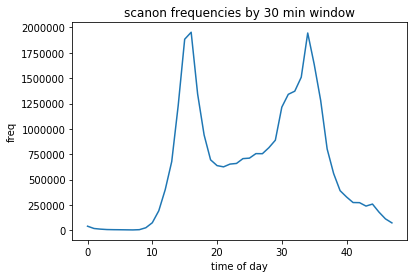

In [20]:
# look at pattern of cards scan on and off by hourly window
myPlt = grp['Freq'].plot()
plt.title('scanon frequencies by 30 min window')
plt.ylabel('freq'), plt.xlabel('time of day');

In [21]:
grp.columns

Index(['Time', 'Minutes', 'Freq', 'Day', 'normFreq', 'Peak'], dtype='object')

In [46]:
grp.sample(10)

,Time,Minutes,CardID,Day1
3,01:30:00,3.0,890,04-Mar-2018
38,19:00:00,38.0,50700,04-Mar-2018
19,09:30:00,19.0,61228,04-Mar-2018
20,10:00:00,20.0,56173,04-Mar-2018
21,10:30:00,21.0,53349,04-Mar-2018
8,04:00:00,8.0,570,04-Mar-2018
4,02:00:00,4.0,664,04-Mar-2018
46,23:00:00,46.0,17530,04-Mar-2018
29,14:30:00,29.0,68588,04-Mar-2018
11,05:30:00,11.0,14110,04-Mar-2018


In [34]:
allGrps['Day'].min()

'04-Mar-2018'

In [31]:
allGrps.sample(10)

,Day,newDateTime,CardID,Minutes,Time
170,07-Mar-2018,2018-03-07 17:00:00,9027,34.0,17:00:00
323,10-Mar-2018,2018-03-10 21:30:00,2416,43.0,21:30:00
23,04-Mar-2018,2018-03-04 15:30:00,2105,31.0,15:30:00
112,06-Mar-2018,2018-03-06 12:00:00,5880,24.0,12:00:00
302,10-Mar-2018,2018-03-10 11:00:00,2571,22.0,11:00:00
284,10-Mar-2018,2018-03-10 02:00:00,171,4.0,02:00:00
184,08-Mar-2018,2018-03-08 00:00:00,105,0.0,00:00:00
253,09-Mar-2018,2018-03-09 10:30:00,2817,21.0,10:30:00
129,06-Mar-2018,2018-03-06 20:30:00,2886,41.0,20:30:00
47,05-Mar-2018,2018-03-05 03:30:00,1,7.0,03:30:00


In [ ]:
# todo add in sunrise/sunset


In [21]:
grp.sample(10)

,Day,DateTime,Freq,normFreq,Minutes
14,04-Mar-2018,2018-03-04 11:00:00,5617,0.176886,660.0
178,07-Mar-2018,2018-03-07 21:00:00,3861,0.121587,1260.0
314,10-Mar-2018,2018-03-10 17:00:00,9324,0.293623,1020.0
54,05-Mar-2018,2018-03-05 07:00:00,19634,0.618296,420.0
215,08-Mar-2018,2018-03-08 15:30:00,20122,0.633664,930.0
259,09-Mar-2018,2018-03-09 13:30:00,9482,0.298599,810.0
71,05-Mar-2018,2018-03-05 15:30:00,19886,0.626232,930.0
279,09-Mar-2018,2018-03-09 23:30:00,2505,0.078885,1410.0
51,05-Mar-2018,2018-03-05 05:30:00,2685,0.084554,330.0
241,09-Mar-2018,2018-03-09 04:30:00,274,0.008629,270.0


In [29]:
grp.columns

Index(['Day', 'ParentRoute', 'newDateTime', 'CardID'], dtype='object')